/tmp/ipykernel_5705/4192509727.py:4: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


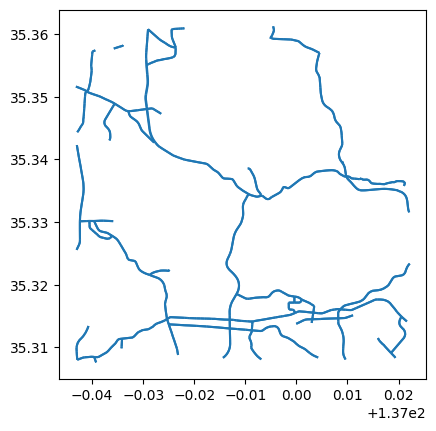

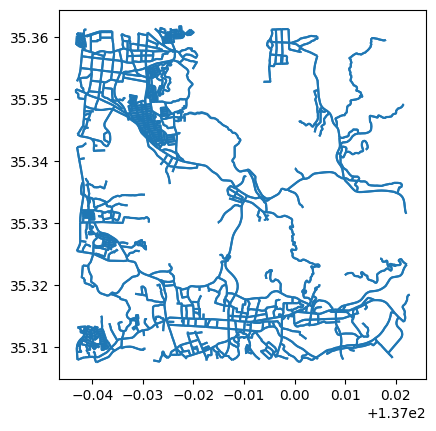

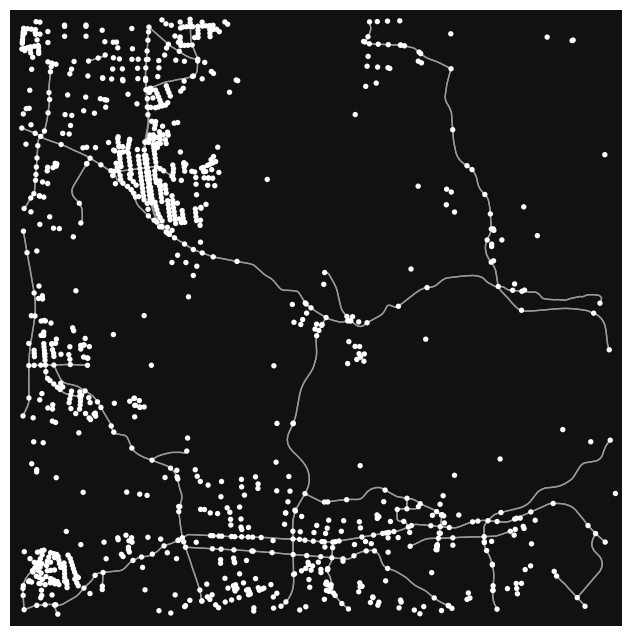

/tmp/ipykernel_5705/4192509727.py:25: UserWarning: The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  map_osm = ox.plot_graph_folium(map_osm, edge_width=2)


In [38]:
import osmnx as ox
import folium

ox.config(use_cache=True, log_console=True)

# 峠道
graph = ox.graph_from_point(center_point=(35.33456,136.98990)
                                , network_type='drive'
                                , dist=1000)

# グラフデータをGeoDataFrameに変換
gdf_nodes = ox.graph_to_gdfs(graph, nodes=True, edges=False)
gdf_edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

# GeoDataFrameを活用した解析と可視化
# 道路ネットワークの可視化
primary_roads = gdf_edges[gdf_edges["highway"].isin(["primary", "tertiary", "secondary"])]
primary_roads.plot()
gdf_edges.plot()

# # 大通りの道の地図を描画
map_osm = ox.graph_from_gdfs(gdf_nodes,primary_roads)
ox.plot_graph(map_osm)
# 大通りの道の地図を描画
map_osm = ox.plot_graph_folium(map_osm, edge_width=2)

# 地図を表示
map_osm